# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller problems on your own.

# Topic: 2nd Moment and First Moment Shocks to Equity returns

you will learn about

- Measuring Uncertainty in Equity Markets
- Gram-Schmidt Orthogonalization
- AR(1) regressions
- principal component analysis
- fitting stochastic volatility models
- extracting volatility shocks
- testing the so called 'spanning hypothesis' for equity volatility

# Tasks

We want to learn about the similarity and dissimilarity of US and EU uncertainty. Moreover, we want to learn whether return shocks span volatility shocks.

**Hint:** When working with principal components, use normalized data (i.e. 'z')
$$
\\
$$

**A. Load-in US and EU data**. 

- ignore the equal weight portfolio (i.e. focus on individual stocks only) 

- Ensure that start and end date are aligned across both data sets 
Hint: (i.e. Full Outer Joint) 
https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

 
$$
\\
$$

**B. Extract the first two principal components of the international return panel. Ensure that these are displayed with a mean of zero and a unit volatility**

- How important are the first and the second principal components?

- Plot the time series of both principal components


$$
\\
$$

**C. Compute PC1 of the EU returns and PC1 of the US returns. Ensure that these are displayed with a mean of zero and a unit volatility.**

- Plot both PCs

-  How large is the unconditional correlation of the EU and the US first principal component of returns?

- Regress PC1 of the international return panel onto PC1 of EU equity. How large ist the adj-R2? How large are the point estimates and t-stats?

- Regress PC1 of the international return panel onto the Gram-Schmidt orthogonalized first principal components of US and EU equity. Treat the common information in PC1(US equity) and PC1(EU equity) as US only information. How much additional variance explained does EU information (that is orthogonal to US information) add for explaining variations in PC1 of the international return panel?

Hint on Gram-Schmidt: See example 6:35min/8:11min in https://www.youtube.com/watch?v=4Rzn-Pfvof4&list=PLyQSjcv8LwAHcUWCG-zRWbzuczxa0hB3n&index=3

- Regress PC1 of the international return panel onto PC1 of US equity. How large ist the adj-R2? How large are the point estimates and t-stats?
    
$$
\\
$$

**D.  Filter time-series of variance** for
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}
using univariate stochastic volatility models.

- What are the pariwise correlations of the respective variances? Interpret results.

- Plot the filtered variances in one graph. Looking at uncertainties, which currency area was the epicenter of the Covid pandemic?
$$
\\
$$

**E. Extract the time-series of volatility shocks** for 
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

Hint: look carefully at the parametrization of a SVM.

- By how much do US volatility shocks outweigh ES volatility shocks?  

- What are the pairwise correlations of volatility shocks?
$$
\\
$$

**F. Extract the time-series of return shocks** for 
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

What are the pariwise correlations of the return shocks? Interpret results.
 
Hint: Assume the mean equation for these quantities follows an AR(1). 
$$
\\
$$

**G. Do return shocks span volatility shocks? To answer the question, regress volatility shocks** of
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

onto their respective return shocks. How large are the respective R2, point (t-stat) estimates? Interpret results.

A. Load-in US and EU data.
ignore the equal weight portfolio (i.e. focus on individual stocks only)
Ensure that start and end date are aligned across both data sets Hint: (i.e. Full Outer Joint) https://www.datacamp.com/community/tutorials/joining-dataframes-pandas


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Task A

In [4]:
es_r = pd.read_csv("r_ES50_d_cleaned_realized_Nov2020.csv", parse_dates = True, index_col=0)
sp_r = pd.read_csv("r_SP500_d_cleaned_Dec2020.csv", parse_dates = True, index_col=0)
es_r.drop(columns=["1/N"], inplace=True)

In [5]:
# Combine ES50 and S&P500 data
df = sp_r.join(es_r, on="Date", how="inner")

# Task B

In [6]:
# Precprocessing: z-score scaling for pca
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

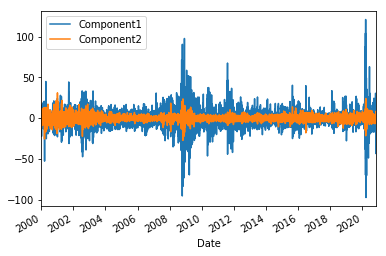

In [73]:
pca = PCA(n_components=2)
pcs_df_scaled = pca.fit_transform(df_scaled)
pd.DataFrame(pcs_df_scaled, index=df.index).iloc[:,0:2].plot()
plt.legend(["Component1", "Component2"])

plt.show()

In [8]:
evar_comp1, evar_comp2 = pca.explained_variance_ratio_[0:2]
print(f"the explained vars of \n component 1: {round(evar_comp1, 2)} \n component 2: {round(evar_comp2, 2)}")

the explained vars of 
 component 1: 0.33 
 component 2: 0.04


## Task C 
1. Compute PC1 of the EU returns and PC1 of the US returns. Ensure that these are displayed with a mean of zero and a unit volatility.
2. Plot both PCs
3. How large is the unconditional correlation of the EU and the US first principal component of returns?
4. Regress PC1 of the international return panel onto PC1 of EU equity. How large ist the adj-R2? How large are the point estimates and t-stats?
5. Regress PC1 of the international return panel onto the Gram-Schmidt orthogonalized first principal components of US and EU equity. Treat the common information in PC1(US equity) and PC1(EU equity) as US only information. How much additional variance explained does EU information (that is orthogonal to US information) add for explaining variations in PC1 of the international return panel?

Hint on Gram-Schmidt: See example 6:35min/8:11min in https://www.youtube.com/watch?v=4Rzn-Pfvof4&list=PLyQSjcv8LwAHcUWCG-zRWbzuczxa0hB3n&index=3
Regress PC1 of the international return panel onto PC1 of US equity. How large ist the adj-R2? How large are the point estimates and t-stats?

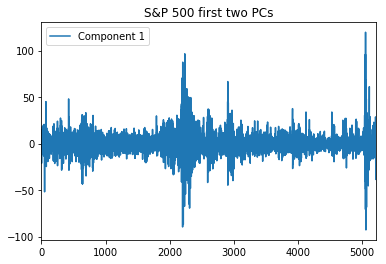

the explained vars of 
 component 1: 0.3453827563173755


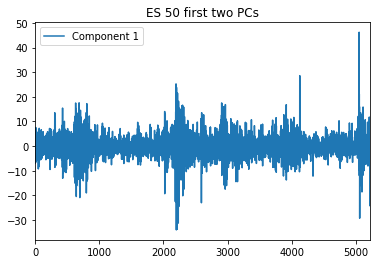

the explained vars of 
 component 1: 0.45336953673574587


In [74]:
es_r_scaled = df_scaled[es_r.columns]
sp_r_scaled = df_scaled[sp_r.columns]

sp_pca = PCA(n_components=1)
es_pca = PCA(n_components=1)

pcs_sp_scaled = sp_pca.fit_transform(sp_r_scaled)
pcs_es_scaled = es_pca.fit_transform(es_r_scaled)

pd.DataFrame(pcs_sp_scaled, index=sp_r_scaled.index).iloc[:,0].plot()
plt.legend(["Component 1"])
plt.title("S&P 500 first two PCs")
plt.pause(1)

print(f"the explained vars of \n component 1: {sp_pca.explained_variance_ratio_[0]}")

pd.DataFrame(pcs_es_scaled, index=es_r_scaled.index).iloc[:,0].plot()
plt.legend(["Component 1"])
plt.title("ES 50 first two PCs")
plt.pause(1)

print(f"the explained vars of \n component 1: {es_pca.explained_variance_ratio_[0]}")

In [10]:
corr = np.corrcoef(pcs_sp_scaled[:,0], pcs_es_scaled[:,0])
print(f"Correlation of pc1_sp500 and pc1_es50 is \n {round(corr[0][1], 2)}")

Correlation of pc1_sp500 and pc1_es50 is 
 0.61


**Summary of EU and international data**

In [58]:
# Regress PC1 of the international return panel onto PC1 of EU equity. 
# How large ist the adj-R2? How large are the point estimates and t-stats?

pc1_df = pcs_df_scaled[:,0]
pc1_es = pcs_es_scaled[:,0]

gls_reg_es_int = sm.GLS(pc1_es, pc1_df)
fit_gls_reg_es_int = gls_reg_es_int.fit()

fit_gls_reg_es_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.440
Model:                            GLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     4109.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:37:27   Log-Likelihood:                -13593.
No. Observations:                5224   AIC:                         2.719e+04
Df Residuals:                    5223   BIC:                         2.720e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2465      0.004     64.099      0.000       0.239       0.254
==============================================================================
Omnibus:                      812.416   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12298.973
Skew:                           0.216   Prob(JB):                         0.00
Kurtosis:                      10.504   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
pc1_sp = pcs_sp_scaled[:,0]

gls_reg_int_sp = sm.GLS(pc1_sp, pc1_df)
fit_gls_reg_int_sp = gls_reg_int_sp.fit()

**Summary of US and international data**

In [78]:
fit_gls_reg_int_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            GLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.714e+05
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:24:22   Log-Likelihood:                -6467.2
No. Observations:                5224   AIC:                         1.294e+04
Df Residuals:                    5223   BIC:                         1.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9690      0.001    985.611      0.000       0.967       0.971
==============================================================================
Omnibus:                      820.798   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12700.010
Skew:                          -0.217   Prob(JB):                         0.00
Kurtosis:                      10.626   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
def gs(vectors):
    v, w = vectors, [vectors[0]]
    sum_j = 0
    for i in range(1, len(vectors)):
        j = i - 1
        sum_j = sum_j + (np.dot(w[j], v[i]) / np.dot(w[j],w[j]))*w[j]
        w.append(v[i] - sum_j)
    return w

def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - np.sum( np.dot(v,b)*b  for b in basis )
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

orth_sp, orth_es = gram_schmidt([pc1_sp, pc1_es])



orth_gls_reg = sm.GLS(pc1_df,np.transpose(orth_es))
fit_orth_gls_reg = orth_gls_reg.fit()
fit_orth_gls_reg.summary()

/anaconda3/envs/prim/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            GLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     28.06
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.22e-07
Time:                        13:17:10   Log-Likelihood:                -20267.
No. Observations:                5224   AIC:                         4.054e+04
Df Residuals:                    5223   BIC:                         4.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            62.0544     11.714      5.297      0.000      39.090      85.019
==============================================================================
Omnibus:                     1233.434   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33583.272
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                      15.379   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
np.dot(orth_sp, orth_es)

-5.6924002187278e-17

## Task D

Filter time-series of variance for

\begin{itemize}
    \item PC1(international equity)  
    \item PC1(US equity)
    \item PC1(EU equity)
\end{itemize}
 
using univariate stochastic volatility models.

What are the pariwise correlations of the respective variances? Interpret results.

Plot the filtered variances in one graph. Looking at uncertainties, which currency area was the epicenter of the Covid pandemic?

In [15]:
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV
svm_df = QLSV(pc1_df - pc1_df.mean())
res_df = svm_df.fit(cov_type='robust')
print(res_df.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11845.468
Date:                Tue, 08 Dec 2020   AIC                          23696.937
Time:                        11:43:45   BIC                          23716.620
Sample:                             0   HQIC                         23703.820
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9843      0.004    270.422      0.000       0.977       0.991
sigma2_eta     0.0346      0.007      4.880      0.000       0.021       0.048
mu             4.1545      0.167     24.839      0.0

In [16]:
svm_cond_vol_df = np.exp(res_df.smoothed_state[0] / 2)

svm_es = QLSV(pc1_es - pc1_es.mean())
res_es = svm_es.fit(cov_type='robust')
svm_cond_vol_es = np.exp(res_es.smoothed_state[0] / 2)
print(res_es.summary())

svm_sp = QLSV(pc1_sp - pc1_sp.mean())
res_sp = svm_sp.fit(cov_type='robust')
svm_cond_vol_sp = np.exp(res_sp.smoothed_state[0] / 2)
print(res_sp.summary())


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11721.316
Date:                Tue, 08 Dec 2020   AIC                          23448.633
Time:                        11:43:46   BIC                          23468.316
Sample:                             0   HQIC                         23455.516
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9854      0.004    280.201      0.000       0.978       0.992
sigma2_eta     0.0266      0.006      4.571      0.000       0.015       0.038
mu             2.3775      0.155     15.329      0.0

In [17]:
print("Correlation coefficients:")
print(f"INT-US {str(np.corrcoef(svm_cond_vol_df, svm_cond_vol_sp)[0,1])}")
print(f"INT-EU {str(np.corrcoef(svm_cond_vol_df, svm_cond_vol_es)[0,1])}")
print(f"US-EU {str(np.corrcoef(svm_cond_vol_sp, svm_cond_vol_es)[0,1])}")


Correlation coefficients:
INT-US 0.9928380448283929
INT-EU 0.8230399684192348
US-EU 0.7972245083368685


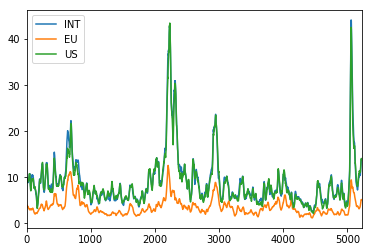

In [18]:
vols = pd.DataFrame({"INT": svm_cond_vol_df, "EU": svm_cond_vol_es, "US": svm_cond_vol_sp}, index=df_scaled.index)
vols.plot()

# Task E

E. Extract the time-series of volatility shocks for
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}
 
Hint: look carefully at the parametrization of a SVM.

By how much do US volatility shocks outweigh ES volatility shocks?

What are the pairwise correlations of volatility shocks?

In [19]:
eta_df = res_df.smoothed_measurement_disturbance.flatten()
eta_es = res_es.smoothed_measurement_disturbance.flatten()
eta_sp = res_sp.smoothed_measurement_disturbance.flatten()


print("Corr INT-EU", np.corrcoef(eta_df, eta_es)[0,1])
print("Corr US-EU", np.corrcoef(eta_sp, eta_es)[0,1])
print("Corr INT-US", np.corrcoef(eta_df, eta_sp)[0,1])

Corr INT-EU 0.25927330530574544
Corr US-EU 0.2180815405866427
Corr INT-US 0.9060776031648368


In [30]:
print("Ratio is",  eta_sp.std() - eta_es.std())

Ratio is 0.031194175940328694


In [27]:
eta1 = res_df.smoothed_state[0,2] - 0.9843*res_df.smoothed_state[0,1]
eta2 = res_df.smoothed_measurement_disturbance.flatten()

print(f"Why isn't {eta1} = {eta2[2]}?")

Why isn't 0.07416896956029184 = 2.87651301593109


In [ ]:
# Task F